# Psychoinformatics - Week 10 (Examples)
by 楊宗樺 (b05705050@ntu.edu.tw)

In [14]:
import warnings, numpy as np
import xgboost
from matplotlib.pyplot import *
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn import *

# 1 執行並觀察以下的機器學習結果 (0分)

## 1.0 IRIS dataset & Ensemble model function

In [15]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [16]:
np.random.seed(0)
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1)
def EnsembleModels(model, Max_n_estimators):
    accs=[] # mean cross-validation accuracies of the models w/ different n_estimators from 1..Max_n_estimators
    for n in range(1,Max_n_estimators+1):  
        print(n,end=' ') # showing progress
        model.n_estimators=n
        acc=[] # cross-validation accuracies of the ensemble model w/ n_estimators=n
        for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation of one ensemble model
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            model.fit(X_train[:,0:2],Y_train) #training
            acc.append(model.predict(X_test[:,0:2])==Y_test) 
        accs.append(np.mean(acc)) # aggregating mean cross-validation accuracies across all the ensemble models
    return(accs)

## 1.1 Bagging (Bootstrap Aggregating)

### 1.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

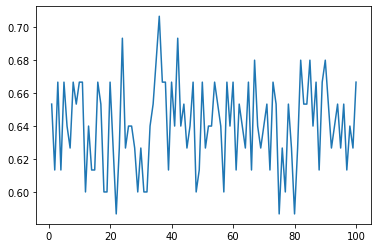

In [17]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

### 1.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

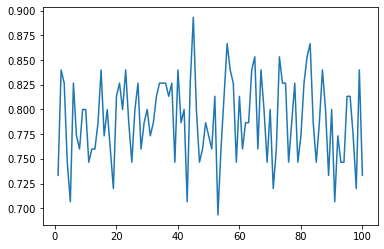

In [7]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

## 1.2 Boosting

### 1.2.1 AdaBoost

#### 1.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

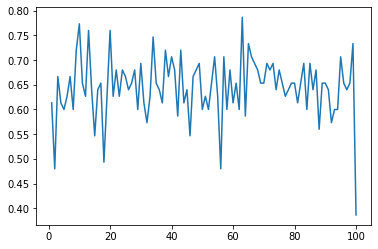

In [8]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

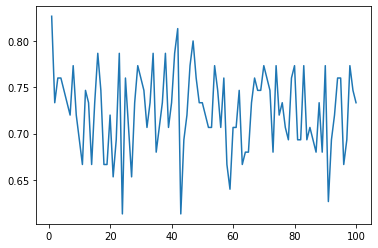

In [9]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

### 1.2.2 Gradient Boosting

The following two implementations are conceptually identical but XGBoost is more resource-efficient and can be parallelized/distributed.

#### 1.2.2.1 Scikit-learn's Gradient Tree Boosting

##### 1.2.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

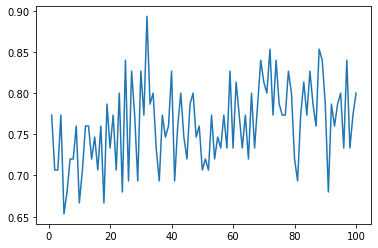

In [10]:
model=ensemble.GradientBoostingClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

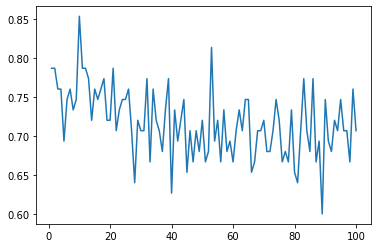

In [11]:
model=ensemble.GradientBoostingClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.2.2 XGBoost (eXtreme Gradient Boosting)

##### 1.2.2.2.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

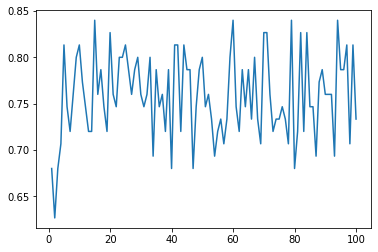

In [12]:
model=xgboost.XGBClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.2.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

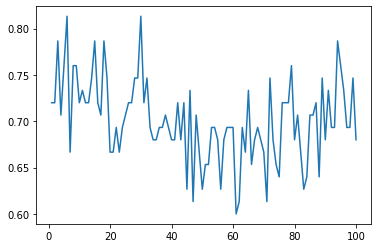

In [13]:
model=xgboost.XGBClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

# 2 根據以上的觀察回答以下的問題 (6 分)

## 2.1 在Bagging時, 1.1.2中複雜模型的正確率是否比1.1.1簡單模型的正確率好或差? 為什麼 (2分)

#### 1.1.2的max_depth比較大->模型較複雜
#### 複雜模型的準確率比簡單模型的好
#### 複雜的model variance大，但在bagging時，可以將不同的複雜model做投票，最終產出的model的variance就不會如同原本那樣大，同時bias小，準確率自然比較佳

## 2.2 在Boosting時, 1.2.1.2/1.2.2.1.2/1.2.2.2.2中複雜模型的正確率是否比1.2.1.1/1.2.2.1.1/1.2.2.2.1中相對應的簡單模型正確率好或差? 為什麼 (2分)

#### AdaBoost-> 複雜模型較佳 =>AdaBoost會提高前面分類器的錯誤train data的權重，每次訓練新的分類器會加強訓練那些錯誤train data。每個分類器使用加權投票機制取代平均投票機制，準確率較高的分類器有較高權重，反之，準確率較低的分類器有較低權重。max_depth較大，模型複雜，得出較多準確度高的分類器，且有較高權重，使得複雜模型有較高的準確率。
#### Gradient Boosting-> 簡單模型較佳=>複雜的模型確實會抓到更多偏差，但有機會導致過擬和的問題，使得真正在test時準確率不高，畢竟模型對於新的data是未知的。此外在Gradient的分類器們彼此不能偏差太大，會彼此干擾，降低準確率。
#### XGBoost-> 簡單模型較佳=>複雜的模型確實會抓到更多偏差，但有機會導致過擬和的問題，使得真正在test時準確率不高。此外在Gradient的分類器們彼此不能偏差太大，會彼此干擾，降低準確率。



## 2.3 為何只有Boosting在簡單模型時(1.2.1.1/1.2.2.1.1/1.2.2.2.1)，正確率大致上會隨著n_estimators數目變多而增加，但Bagging和複雜的Boosting模型卻不是如此? (2分)

#### Bagging 的 n_estimators 數目變多代表重抽樣次數增加，但Bagging每個分類器使用加權投票機制取代平均投票機制，n_estimators數目變多不影響準確率提升。
#### Boosting 在複雜模型時 n_estimators 數目變多，原本就複雜的模型在 n_estimators越大時，越有機會過擬合，且原本弱分類器就學習的不差（因為抓到更多偏差），加入更多較無助於提升正確率。
#### Boosting 在簡單模型時 n_estimators 數目變多，原本簡單模型的弱分類器較不精準（抓到較少偏差），n_estimators 數目變多，可以有更多弱分類器，有助於提升準確率。
